# **Mounting Drive**

In [111]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Import Dependencies**

In [0]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split

# **Check for GPU**

In [113]:
print(tf.test.gpu_device_name())

/device:GPU:0


# **Load Training Data (Aug_PCB) or New Training Data**

In [0]:
XTrain = np.load('drive/My Drive/classification data/Aug_PCB/s_x_train.npy')
YTrain = np.load('drive/My Drive/classification data/Aug_PCB/s_y_train.npy')

# **Load Test Data (Raw_PCB) or New Test Data**

In [0]:
raw_xtrain = np.load('drive/My Drive/classification data/Raw_PCB/s_x_train.npy')
raw_ytrain = np.load('drive/My Drive/classification data/Raw_PCB/s_y_train.npy')

# **Data Pre-processing**

In [0]:
XTrain = XTrain / XTrain.max()
raw_xtrain = raw_xtrain / raw_xtrain.max()

In [117]:
YTrain.astype(int)
raw_ytrain.astype(int)

array([0, 0, 0, ..., 1, 1, 1])

# **Load Already Trained model from zipfile**

In [0]:
from keras.models import load_model
model = load_model('192CS014_PCB_Classification.h5')

# **Train the Model on different data set**

In [119]:
model = keras.Sequential([
                             
    keras.layers.Conv2D(6, (3, 3), input_shape=(300,300,3), activation='tanh', padding='valid'),
    keras.layers.AveragePooling2D(pool_size=(2,2), strides=(2,2)),

    keras.layers.Conv2D(16, (3, 3), activation='tanh', padding='valid'),
    keras.layers.AveragePooling2D(pool_size=(2,2), strides=(2,2)),

    keras.layers.Flatten(),
    keras.layers.Dense(120, activation='tanh'),
    keras.layers.Dense(84, activation='tanh'),
    keras.layers.Dense(2, activation='softmax')
])

model.summary()
 
model.compile(optimizer='SGD', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
print(XTrain.shape)
print(YTrain.shape)
model.fit(XTrain, YTrain, batch_size=10, epochs=20)

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 298, 298, 6)       168       
_________________________________________________________________
average_pooling2d_12 (Averag (None, 149, 149, 6)       0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 147, 147, 16)      880       
_________________________________________________________________
average_pooling2d_13 (Averag (None, 73, 73, 16)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 85264)             0         
_________________________________________________________________
dense_14 (Dense)             (None, 120)               10231800  
_________________________________________________________________
dense_15 (Dense)             (None, 84)               

# **Prediction**

In [0]:
raw_rounded_prediction = model.predict_classes(raw_xtrain, verbose=0)

# **Dependencies and function to plot confusion matrix**

In [0]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [0]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# **Confusion Matrix and Accuracies for Test Samples**

Confusion matrix, without normalization
[[ 145    4]
 [  18 2502]]
84/84 [==============================] - 2s 27ms/step - loss: 0.0251 - accuracy: 0.9918

Test accuracy: 0.9917572140693665


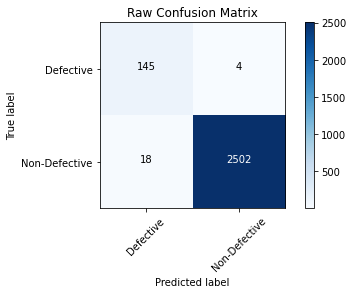

In [123]:
raw_cm = confusion_matrix(raw_ytrain, raw_rounded_prediction)
raw_cm_plot_labels = ["Defective", "Non-Defective"]
plot_confusion_matrix(raw_cm, raw_cm_plot_labels, title="Raw Confusion Matrix")

test_loss, test_acc = model.evaluate(raw_xtrain, raw_ytrain)
print('\nTest accuracy: {}'.format(test_acc))

In [124]:
raw_defective_accuracy = (raw_cm[0][0]/(raw_cm[0][0]+raw_cm[0][1]))*100
raw_non_defective_accuracy = (raw_cm[1][1]/(raw_cm[1][0]+raw_cm[1][1]))*100
print('Accuracy in %')
print('\nDefective accuracy: {}'.format(raw_defective_accuracy))
print('\nNon-Defective accuracy: {}'.format(raw_non_defective_accuracy))

Accuracy in %

Defective accuracy: 97.31543624161074

Non-Defective accuracy: 99.28571428571429
